## Get Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../input/train_set.csv')
val_df = pd.read_csv ('../input/val_set.csv')
test_df = pd.read_csv('../input/test_set.csv')

In [3]:
print(f'Train Set Shape: {train_df.shape}')
print(f'Validation Set Shape: {val_df.shape}')
print(f'Test Set Shape: {test_df.shape}')

Train Set Shape: (6000, 7)
Validation Set Shape: (1000, 7)
Test Set Shape: (1000, 7)


## Prepare Data

### Tokenize and Create Padded Sequences

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Specify Size of Vocabulary
vocab_size = 5000

tokenizer = Tokenizer(num_words=vocab_size)  
tokenizer.fit_on_texts(train_df['News Text'])  

In [7]:
print (len(tokenizer.word_index))

54970


In [8]:
train_sequences = tokenizer.texts_to_sequences(train_df['News Text'])
val_sequences = tokenizer.texts_to_sequences(val_df['News Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['News Text'])

In [140]:
# specify max size of document
max_length = 100
# pad sequences
train_x = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_x = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_x = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [141]:
train_x.shape

(6000, 100)

In [142]:
val_x.shape

(1000, 100)

In [143]:
test_x.shape

(1000, 100)

### Get Label Data

In [144]:
from sklearn.preprocessing import LabelEncoder

In [145]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_df["Category"])
val_y = encoder.fit_transform(val_df["Category"])
test_y = encoder.transform (test_df["Category"])

In [146]:
print(f'train_y shape: {train_y.shape}')
print(f'val_y shape: {val_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: (6000,)
val_y shape: (1000,)
test_y shape: (1000,)


# Model Training

In [147]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU

### Function to Plot Losses

In [151]:
import matplotlib.pyplot as plt

def plot_losses(history):
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(train_loss))
    
    # Plot
    plt.plot(epochs, train_loss, label="Training Loss", color="blue")
    plt.plot(epochs, val_loss, label="Validation Loss", color="red")

    # Labels and legend
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

### Early Stopping Callback

In [160]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,
    restore_best_weights=True
)

## Model 1

In [157]:
# create model
model_1 = Sequential()
model_1.add(Embedding(vocab_size, 8))
model_1.add(GRU(4))
model_1.add(Dense(4, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [158]:
history_1 = model_1.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3164 - loss: 1.3625 - val_acc: 0.5080 - val_loss: 1.0331
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.5089 - loss: 0.9777 - val_acc: 0.5270 - val_loss: 0.9324
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.5755 - loss: 0.8572 - val_acc: 0.5960 - val_loss: 0.8551
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.6360 - loss: 0.7878 - val_acc: 0.6400 - val_loss: 0.8133
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.6931 - loss: 0.7415 - val_acc: 0.7090 - val_loss: 0.7635
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7752 - loss: 0.6529 - val_acc: 0.7920 - val_loss: 0.6406
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8673 - loss: 0.4870 - val_acc: 0.8590 - val_loss: 0.5140
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9153 - loss: 0.3404 - val_acc: 0.8870 - val_loss: 0.4403
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

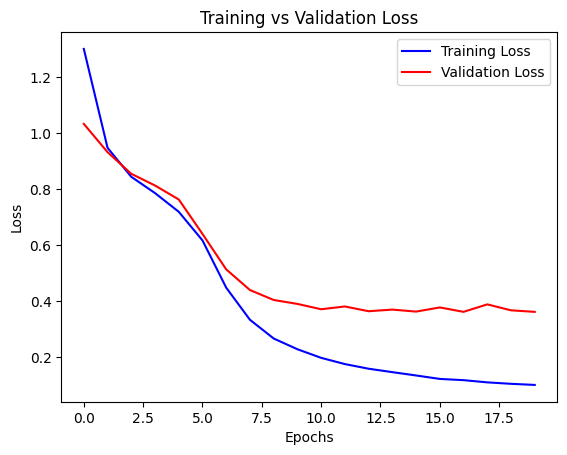

In [159]:
plot_losses(history_1)

## Model 2

### Increase Epochs

In [161]:
# create model
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 8))
model_2.add(GRU(4))
model_2.add(Dense(4, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [162]:
history_2 = model_2.fit(train_x, train_y, epochs=30, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.3274 - loss: 1.3510 - val_acc: 0.5050 - val_loss: 0.9978
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.5085 - loss: 0.9542 - val_acc: 0.5560 - val_loss: 0.8994
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.5978 - loss: 0.8415 - val_acc: 0.6160 - val_loss: 0.8696
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.6579 - loss: 0.7868 - val_acc: 0.6610 - val_loss: 0.8123
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.7415 - loss: 0.7087 - val_acc: 0.7660 - val_loss: 0.7188
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8413 - loss: 0.5559 - val_acc: 0.8220 - val_loss: 0.5927
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8989 - loss: 0.4265 - val_acc: 0.8630 - val_loss: 0.4997
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9244 - loss: 0.3253 - val_acc: 0.8750 - val_loss: 0.4522
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

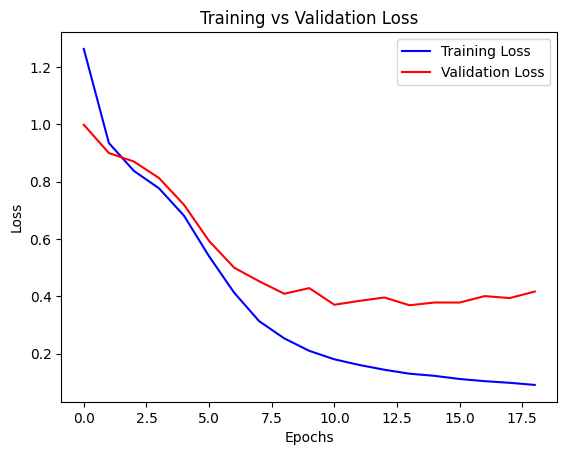

In [163]:
plot_losses(history_2)

### Conclusion: Increaing epochs does not affect model performance. Model optimises validation loss within 20 epochs.

## Model 3

### Increase Nodes

In [164]:
# create model
model_3 = Sequential()
model_3.add(Embedding(vocab_size, 8))
model_3.add(GRU(8))
model_3.add(Dense(4, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [165]:
history_3 = model_3.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.3494 - loss: 1.3110 - val_acc: 0.6250 - val_loss: 0.9180
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.5825 - loss: 0.8934 - val_acc: 0.6560 - val_loss: 0.8424
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.6853 - loss: 0.7730 - val_acc: 0.7370 - val_loss: 0.6296
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8344 - loss: 0.5209 - val_acc: 0.8610 - val_loss: 0.4751
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.8872 - loss: 0.3932 - val_acc: 0.8670 - val_loss: 0.4428
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9149 - loss: 0.3179 - val_acc: 0.8590 - val_loss: 0.4676
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9293 - loss: 0.2617 - val_acc: 0.8810 - val_loss: 0.4005
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9412 - loss: 0.2247 - val_acc: 0.8740 - val_loss: 0.4360
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

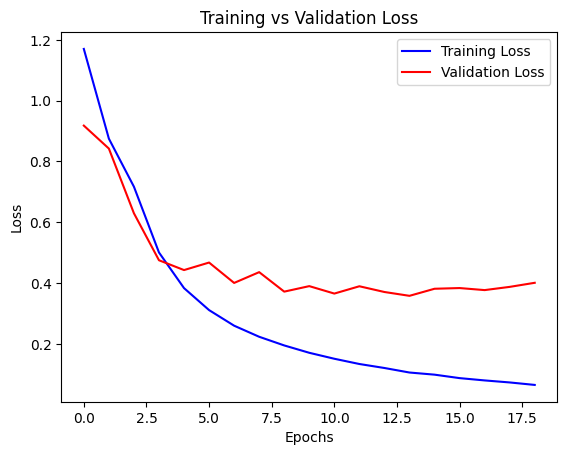

In [166]:
plot_losses(history_3)

### Conclusion: Increasing Nodes form 4 to 8 gives us a slightly better validation loss (0.3581) compared to training with 4 Nodes (0.3624)

## Model 4

### Increase Nodes

In [168]:
# create model
model_4 = Sequential()
model_4.add(Embedding(vocab_size, 8))
model_4.add(GRU(16))
model_4.add(Dense(4, activation='sigmoid'))
model_4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [169]:
history_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3355 - loss: 1.3189 - val_acc: 0.6880 - val_loss: 0.8192
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.7388 - loss: 0.6765 - val_acc: 0.8460 - val_loss: 0.4749
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.9028 - loss: 0.3534 - val_acc: 0.8880 - val_loss: 0.3810
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9323 - loss: 0.2310 - val_acc: 0.9020 - val_loss: 0.3056
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9503 - loss: 0.1825 - val_acc: 0.9100 - val_loss: 0.3205
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9595 - loss: 0.1524 - val_acc: 0.9150 - val_loss: 0.2888
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9652 - loss: 0.1368 - val_acc: 0.9120 - val_loss: 0.3148
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9675 - loss: 0.1210 - val_acc: 0.9100 - val_loss: 0.3640
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

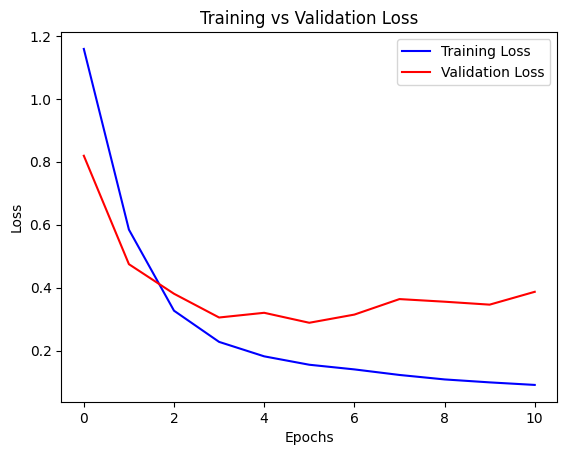

In [170]:
plot_losses(history_4)

### Conclusion: Increasing Nodes to 16 gives a lower validation loss (0.289) than previous models. As expected overfitting starts fairly early, after 6 epochs.

## Model 5

### Increase Nodes to 32

In [172]:
# create model
model_5 = Sequential()
model_5.add(Embedding(vocab_size, 8))
model_5.add(GRU(32))
model_5.add(Dense(4, activation='sigmoid'))
model_5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [173]:
history_5 = model_5.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.3426 - loss: 1.2690 - val_acc: 0.6400 - val_loss: 0.8219
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.7241 - loss: 0.6944 - val_acc: 0.7860 - val_loss: 0.5918
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8496 - loss: 0.4430 - val_acc: 0.8560 - val_loss: 0.4385
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9003 - loss: 0.3150 - val_acc: 0.8700 - val_loss: 0.3922
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9290 - loss: 0.2372 - val_acc: 0.8810 - val_loss: 0.3964
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9426 - loss: 0.2056 - val_acc: 0.9060 - val_loss: 0.3480
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9523 - loss: 0.1687 - val_acc: 0.9060 - val_loss: 0.4186
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9640 - loss: 0.1344 - val_acc: 0.9200 - val_loss: 0.3286
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 

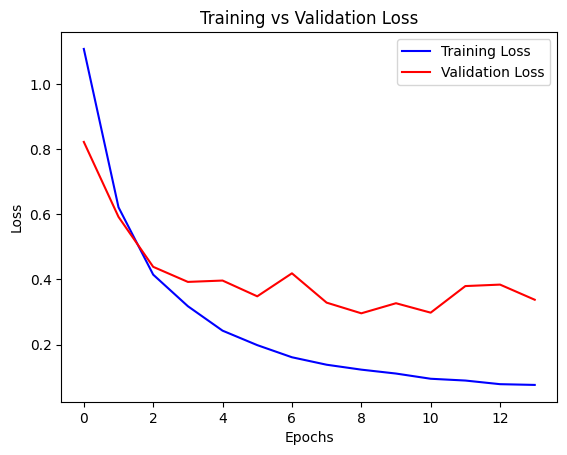

In [174]:
plot_losses(history_5)

### Conclusion: Increasing Nodes to 32 leads to an overly complex model that does not fit as well on the data. Minimum validation loss is 0.296, lower than the previous model

## Model 6

### Add Layer

In [177]:
# create model
model_6 = Sequential()
model_6.add(Embedding(vocab_size, 8))
model_6.add(GRU(16, return_sequences=True))
model_6.add(GRU(4))
model_6.add(Dense(4, activation='sigmoid'))
model_6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [178]:
history_6 = model_6.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.3287 - loss: 1.3075 - val_acc: 0.5130 - val_loss: 0.8994
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - acc: 0.5367 - loss: 0.8802 - val_acc: 0.6280 - val_loss: 0.8415
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.6972 - loss: 0.7756 - val_acc: 0.7330 - val_loss: 0.7224
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - acc: 0.7891 - loss: 0.6027 - val_acc: 0.7830 - val_loss: 0.6445
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.8448 - loss: 0.4828 - val_acc: 0.8390 - val_loss: 0.4934
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.8906 - loss: 0.3540 - val_acc: 0.8770 - val_loss: 0.4200
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.9217 - loss: 0.2714 - val_acc: 0.8830 - val_loss: 0.3725
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.9441 - loss: 0.2069 - val_acc: 0.8940 - val_loss: 0.3471
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

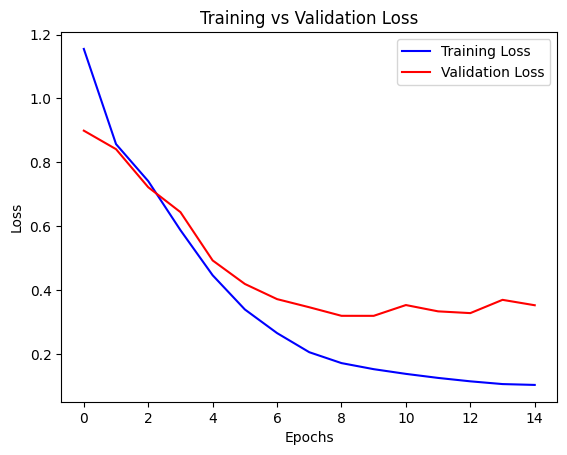

In [179]:
plot_losses(history_6)

### Conclusion: No Improvement after adding extra layer

## Model 7

### Increase Embedding Size

In [183]:
# create model
model_7 = Sequential()
model_7.add(Embedding(vocab_size, 16))
model_7.add(GRU(16))
model_7.add(Dense(4, activation='sigmoid'))
model_7.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [184]:
history_7 = model_7.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3359 - loss: 1.3264 - val_acc: 0.5700 - val_loss: 0.9588
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.7412 - loss: 0.7144 - val_acc: 0.8900 - val_loss: 0.4066
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9200 - loss: 0.3180 - val_acc: 0.8930 - val_loss: 0.3737
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - acc: 0.9403 - loss: 0.2298 - val_acc: 0.9000 - val_loss: 0.3613
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9502 - loss: 0.1899 - val_acc: 0.9140 - val_loss: 0.3480
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9615 - loss: 0.1519 - val_acc: 0.8980 - val_loss: 0.3873
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9663 - loss: 0.1505 - val_acc: 0.9150 - val_loss: 0.3222
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9715 - loss: 0.1244 - val_acc: 0.9120 - val_loss: 0.3480
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms

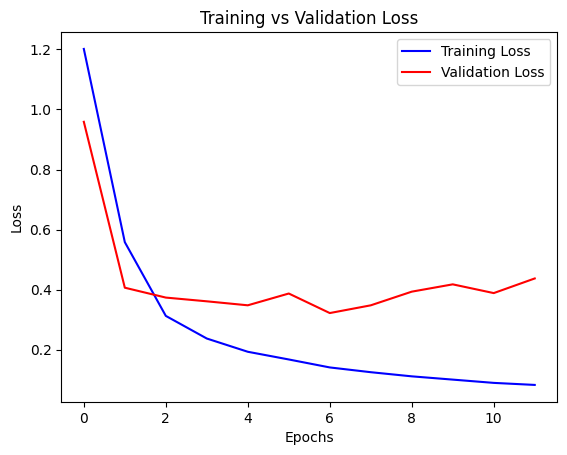

In [185]:
plot_losses(history_7)

### Conclusion: Increasing Embedding Size does not give any indication of improved performance

## Model 8

### Add Dropout

In [186]:
from keras.layers import Dropout

In [187]:
# create model
model_8 = Sequential()
model_8.add(Embedding(vocab_size, 8))
model_8.add(GRU(16))
# drop out 10% of neurons
model_8.add(Dropout(0.1))
model_8.add(Dense(4, activation='sigmoid'))
model_8.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [188]:
history_8 = model_8.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3367 - loss: 1.3178 - val_acc: 0.5860 - val_loss: 0.9105
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.6182 - loss: 0.8087 - val_acc: 0.7600 - val_loss: 0.6906
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8258 - loss: 0.5634 - val_acc: 0.8360 - val_loss: 0.5168
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8802 - loss: 0.4001 - val_acc: 0.8640 - val_loss: 0.4594
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9144 - loss: 0.3073 - val_acc: 0.8730 - val_loss: 0.4258
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9230 - loss: 0.2830 - val_acc: 0.8700 - val_loss: 0.4291
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9396 - loss: 0.2217 - val_acc: 0.8880 - val_loss: 0.3957
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9469 - loss: 0.2015 - val_acc: 0.8820 - val_loss: 0.4583
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

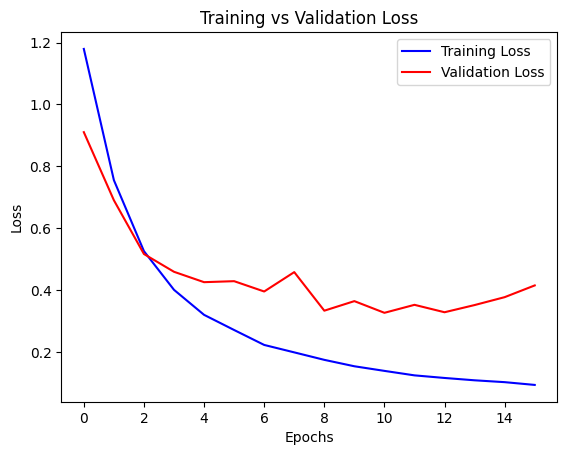

In [189]:
plot_losses(history_8)

### Conclusion: Dropout reduces the representational power of the network

## Model 9

### Add L2 Regularisation

In [191]:
from keras.regularizers import l2

In [198]:
# create model
model_9 = Sequential()
model_9.add(Embedding(vocab_size, 8))
model_9.add(GRU(16, kernel_regularizer=l2(0.001)))
model_9.add(Dense(4, activation='sigmoid'))
model_9.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [199]:
history_9 = model_9.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3407 - loss: 1.3464 - val_acc: 0.5610 - val_loss: 0.9892
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.6044 - loss: 0.9062 - val_acc: 0.7400 - val_loss: 0.6912
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8738 - loss: 0.4406 - val_acc: 0.8830 - val_loss: 0.4175
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9164 - loss: 0.3180 - val_acc: 0.8670 - val_loss: 0.4290
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9322 - loss: 0.2553 - val_acc: 0.9100 - val_loss: 0.3561
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9467 - loss: 0.2039 - val_acc: 0.9050 - val_loss: 0.3553
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9577 - loss: 0.1750 - val_acc: 0.9000 - val_loss: 0.3446
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9649 - loss: 0.1509 - val_acc: 0.9080 - val_loss: 0.3413
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

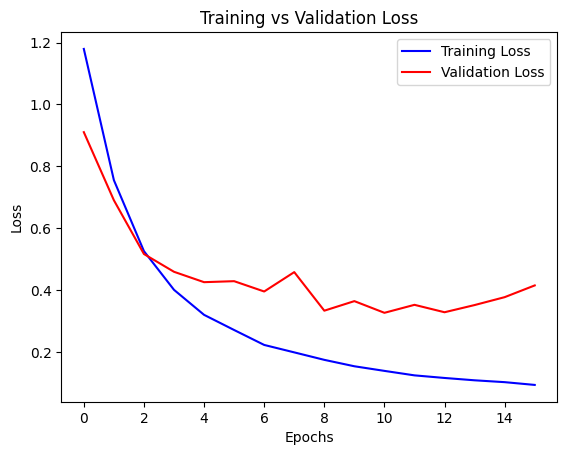

In [189]:
plot_losses(history_9)

### Conclusion: Regularisation adds a very small amount to the validation loss. However, since validation accuracy has been improved slightly, and having reguluarisation improves generalisability, it will be included in the final model

# Get Metrics on Test Set

In [200]:
from sklearn.metrics import classification_report, accuracy_score

In [201]:
y_pred = model_9.predict(test_x)

# Get Label with highest probability
y_pred = y_pred.argmax(axis=1)  

# Generate classification report
report = classification_report(test_y, y_pred, digits=4)  
accuracy = accuracy_score(test_y, y_pred)  

print(report)
print(f"Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0     0.9306    0.9120    0.9212       250
           1     0.9177    0.8920    0.9047       250
           2     0.9144    0.9400    0.9270       250
           3     0.9451    0.9640    0.9545       250

    accuracy                         0.9270      1000
   macro avg     0.9270    0.9270    0.9268      1000
weighted avg     0.9270    0.9270    0.9268      1000

Accuracy: 0.9270
